In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")

In [2]:
df_monthly_infection = pd.read_excel("./data/Monthly_Infection_2001-2024.xlsx")
df_monthly_death = pd.read_excel("./data/Monthly_Death_2019-2024.xlsx")

In [3]:
df_monthly_infection

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Infected
0,2001,0,0,0,0,5,152,310,24,655,514,159,611,2430
1,2002,0,0,0,0,0,566,3281,0,1713,121,10,541,6232
2,2003,0,0,0,2,1,4,4,0,3,372,100,0,486
3,2004,0,0,1,0,1,1209,1261,143,511,395,51,362,3934
4,2005,1,0,0,0,0,3,174,2,337,187,19,325,1048
5,2006,0,0,0,0,0,972,680,100,211,92,0,145,2200
6,2007,0,0,0,0,0,85,179,0,163,0,0,39,466
7,2008,0,0,0,0,0,0,160,473,334,186,0,0,1153
8,2009,0,0,0,0,1,0,4,125,188,156,0,0,474
9,2010,0,0,0,0,0,0,61,183,120,45,0,0,409


In [4]:
month_num_map = {
    "January": "01",
    "February": "02",
    "March": "03",
    "April": "04",
    "May": "05",
    "June": "06",
    "July": "07",
    "August": "08",
    "September": "09",
    "October": "10",
    "November": "11",
    "December": "12",
}

months = list(month_num_map.keys())

In [5]:
df = df_monthly_infection

In [6]:
ordered_year_month = []
time_ordered_infections = []

for i in range(len(df)):
    curr_year = df.iloc[i]["Year"]
    curr_row = []

    for month in months:
        time_format = f"{curr_year}-{month_num_map[month]}"
        
        ordered_year_month.append(time_format)
        time_ordered_infections.append(df.iloc[i][month])

df_dict = {"YearMonth": ordered_year_month, "Infected": time_ordered_infections}

df_new = pd.DataFrame(df_dict)        

In [7]:
df_new

,YearMonth,Infected
0,2001-01,0
1,2001-02,0
2,2001-03,0
3,2001-04,0
4,2001-05,5
...,...,...
283,2024-08,6521
284,2024-09,18097
285,2024-10,30879
286,2024-11,29652


In [8]:
# df_new.to_excel("./data/Dengue_Monthly_Infection_Cleaned_2001-2024.xlsx", index=False)

## Prophet

In [9]:
data = df_new

data["YearMonth"] = pd.to_datetime(data["YearMonth"], format="%Y-%m") + pd.offsets.MonthEnd(0)

data

,YearMonth,Infected
0,2001-01-31,0
1,2001-02-28,0
2,2001-03-31,0
3,2001-04-30,0
4,2001-05-31,5
...,...,...
283,2024-08-31,6521
284,2024-09-30,18097
285,2024-10-31,30879
286,2024-11-30,29652


In [10]:
prophet_df = pd.DataFrame()

prophet_df["ds"] = data["YearMonth"][:]
prophet_df["y"] = data["Infected"][:]

prophet_df

,ds,y
0,2001-01-31,0
1,2001-02-28,0
2,2001-03-31,0
3,2001-04-30,0
4,2001-05-31,5
...,...,...
283,2024-08-31,6521
284,2024-09-30,18097
285,2024-10-31,30879
286,2024-11-30,29652


15:53:02 - cmdstanpy - INFO - Chain [1] start processing
15:53:02 - cmdstanpy - INFO - Chain [1] done processing


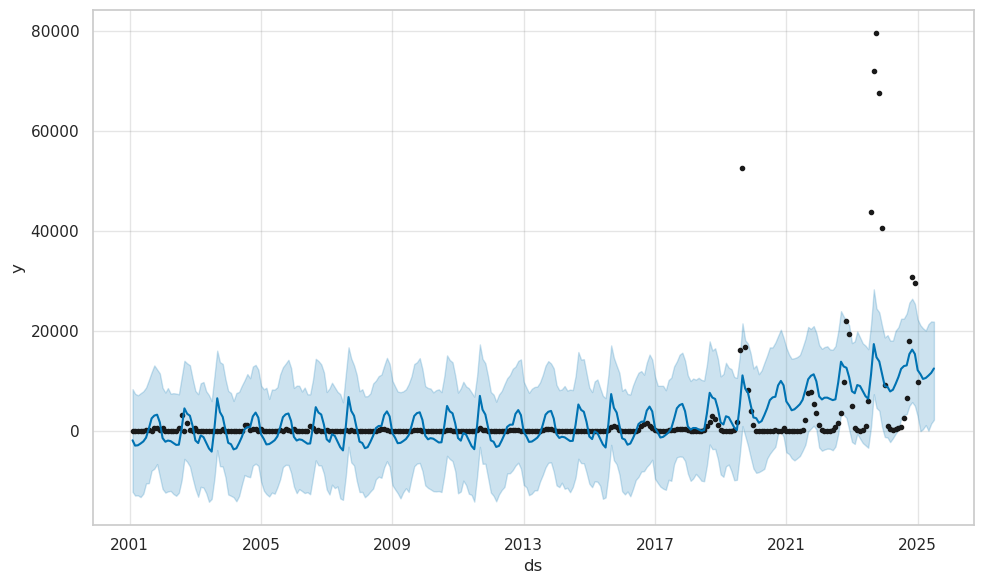

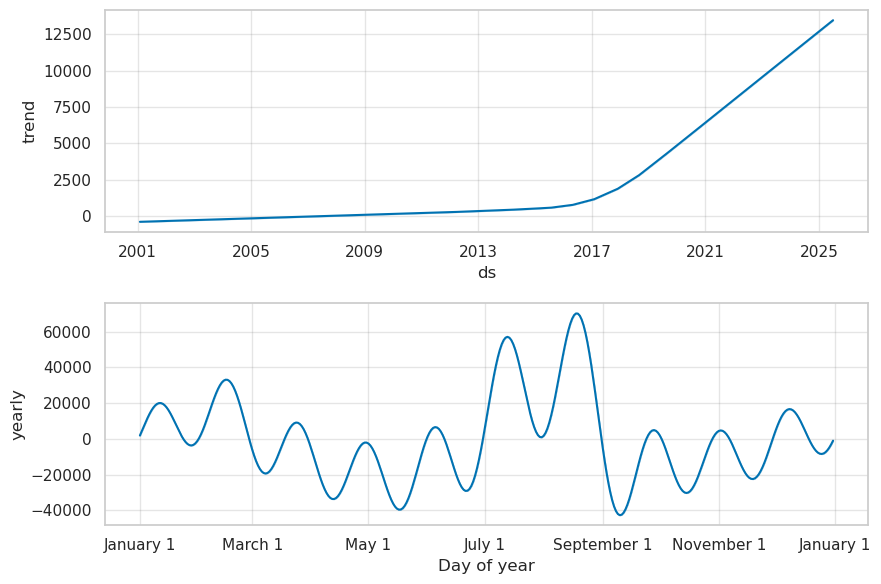

In [11]:
from prophet import Prophet

# Initialize and fit the model
model = Prophet()
model.fit(prophet_df)

# Create future dates
future = model.make_future_dataframe(periods=6, freq='ME')  # Monthly frequency
forecast = model.predict(future)

# Visualize
model.plot(forecast).show()
model.plot_components(forecast).show()

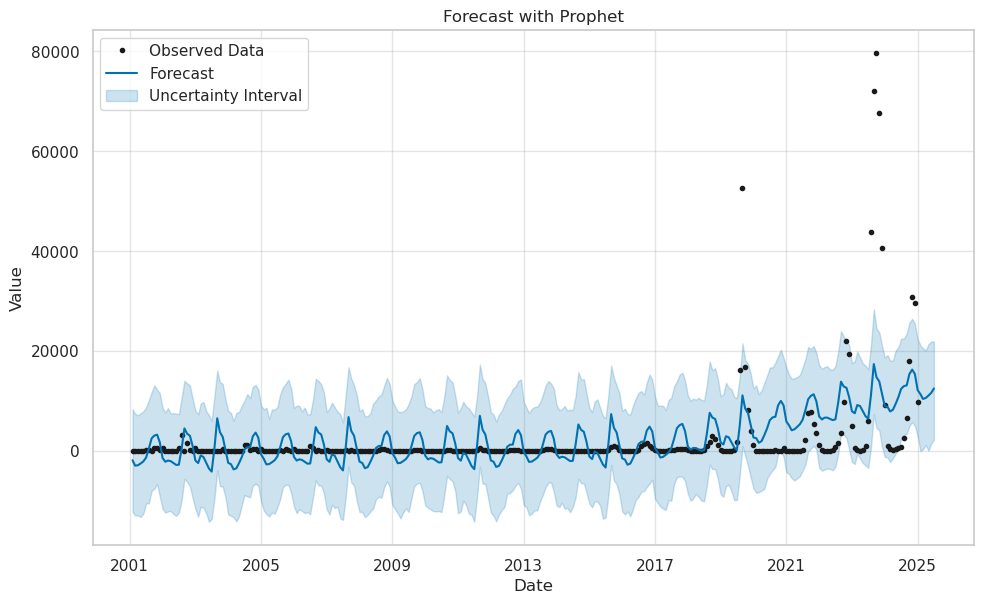

In [12]:
# Plot the forecast
fig = model.plot(forecast)

# Add legend
plt.legend(['Observed Data', 'Forecast', 'Uncertainty Interval'], loc='upper left')
plt.title('Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

15:53:04 - cmdstanpy - INFO - Chain [1] start processing


15:53:04 - cmdstanpy - INFO - Chain [1] done processing


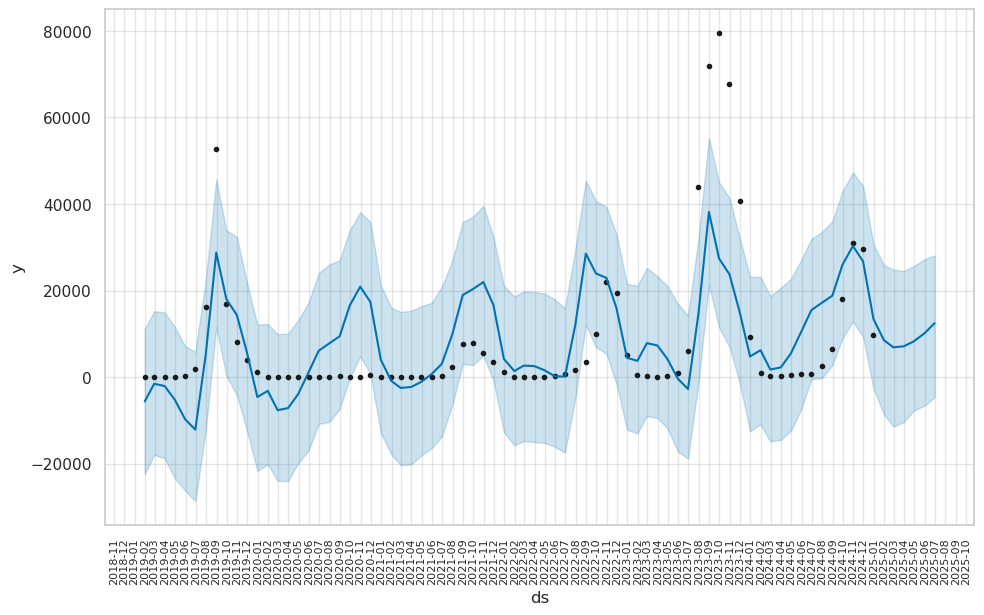

In [15]:
import matplotlib.pyplot as plt
from prophet import Prophet
import pandas as pd
import matplotlib.dates as mdates

model = Prophet()
model.fit(prophet_df[216:])

future = model.make_future_dataframe(periods=6, freq='ME')
forecast = model.predict(future)

fig = model.plot(forecast)

plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tick_params(axis='x', labelsize=8)

plt.show()